In [1]:
import numpy as np
import pandas as pd
datos=pd.read_csv('UNSW_NB15_training-set.csv',sep=';')

In [2]:
datos.head(4)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,1.214780e-01,tcp,-,FIN,6,4,258,172,7408749.0,...,1,1,0,0,0,1,1,0,Normal,0
1,2,6.499020e-01,tcp,-,FIN,14,38,734,42014,78473372.0,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129e+06,tcp,-,FIN,8,16,364,13186,14170161.0,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642e+06,tcp,ftp,FIN,12,12,628,770,13677108.0,...,1,3,1,1,0,2,1,0,Normal,0


In [3]:
nuevodf=pd.DataFrame(datos)

In [4]:
del nuevodf['attack_cat']

In [5]:
del nuevodf['id']

In [6]:
f=pd.unique(nuevodf['service'])#Entrega un array con las categorias de la columna service
a=pd.unique(nuevodf['proto'])#Entrega un array con las categorias de la columna proto
b=pd.unique(nuevodf['state'])#Entrega un array con las categorias de la columna proto
#Listas para asignar valores numéricos a las características cualitativas
f_values=[i for i in range(np.size(f))]
a_values=[i for i in range(np.size(a))]
b_values=[i for i in range(np.size(b))]

In [7]:
#Reemplazar características cualitativas por números
nuevodf=nuevodf.replace(to_replace=b,value=b_values)
nuevodf=nuevodf.replace(to_replace=f,value=f_values)
nuevodf=nuevodf.replace(to_replace=a,value=a_values)

In [8]:
nuevodf.head(10)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1.214780e-01,0,0,0,6,4,258,172,7408749.0,252,...,1,1,1,0,0,0,1,1,0,0
1,6.499020e-01,0,0,0,14,38,734,42014,78473372.0,62,...,1,1,2,0,0,0,1,6,0,0
2,1.623129e+06,0,0,0,8,16,364,13186,14170161.0,62,...,1,1,3,0,0,0,2,6,0,0
3,1.681642e+06,0,1,0,12,12,628,770,13677108.0,62,...,1,1,3,1,1,0,2,1,0,0
4,4.494540e-01,0,0,0,10,6,534,268,33373826.0,254,...,2,1,40,0,0,0,2,39,0,0
5,3.805370e-01,0,0,0,10,6,534,268,3941798.0,254,...,2,1,40,0,0,0,2,39,0,0
6,6.371090e-01,0,0,0,10,8,534,354,26683033.0,254,...,1,1,40,0,0,0,1,39,0,0
7,5.215840e-01,0,0,0,10,8,534,354,32593026.0,254,...,3,1,40,0,0,0,3,39,0,0
8,5.429050e-01,0,0,0,10,8,534,354,31313031.0,254,...,3,1,40,0,0,0,3,39,0,0
9,2.586870e-01,0,0,0,10,6,534,268,57985135.0,254,...,3,1,40,0,0,0,3,39,0,0


In [9]:
#Separa los paquetes normales de las amenazas y se toma 1000 muestras de cada uno
normales_train=nuevodf[nuevodf['label']==0]
normales_train=normales_train[0:1000]
amenazas_train=nuevodf[nuevodf['label']==1]
amenazas_train=amenazas_train[0:1000]
datos_train=pd.concat([normales_train,amenazas_train],axis=0)
del datos_train['label']

In [10]:
from sklearn import preprocessing
x = datos_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normdatos_train = pd.DataFrame(x_scaled)

In [ ]:
normdatos_train

In [ ]:
rows,cols=x_scaled.shape

### SOM

In [11]:
import matplotlib.pyplot as plt
# note: if this fails, try >pip uninstall matplotlib
# and then >pip install matplotlib

def closest_node(data, t, map, m_rows, m_cols):#Funcion para escoger el nodo más cercano al nodo de entrada
  # (row,col) of map node closest to data[t]
    result = (0,0) #inicializacion del resultado 
    small_dist = 1.0e20 #Inicialización de la menor distancia asignando ese valor grande por defecto
    for i in range(m_rows):#recorrido del mapa
        for j in range(m_cols):
            ed = euc_dist(map[i][j], data[t]) #Llamado de la funcion de distancia euclidiana
            if ed < small_dist: #Compara si la distancia calculada es menor que la actual menor distancia
                small_dist = ed
                result = (i, j) #Asigna la ubicación del nodo cercano
    return result

def euc_dist(v1, v2):#Funcion para la distancia euclidiana entre 2 vectores
    return np.linalg.norm(v1 - v2) 

def manhattan_dist(r1, c1, r2, c2): #Funcion de cercania entre nodos
    return np.abs(r1-r2) + np.abs(c1-c2)

def most_common(lst, n):
  # lst is a list of values 0 . . n
    if len(lst) == 0: return -1
    counts = np.zeros(shape=n, dtype=np.int)
    for i in range(len(lst)):
        counts[lst[i]] += 1
    return np.argmax(counts)

In [12]:
def main(datos,label):
  # 0. get started
    np.random.seed(1)
    f,c=datos.shape
    Dim = c
    Rows = 30; Cols = 30
    RangeMax = Rows + Cols
    LearnMax = 0.5
    StepsMax = 5000

  # 1. load data
    data_x = datos
    data_y = label
  # option: normalize data  

  # 2. construct the SOM
    print("Constructing a 30x30 SOM from the iris data")
    map = np.random.random_sample(size=(Rows,Cols,Dim))
    for s in range(StepsMax):
        if s % (StepsMax/10) == 0: print("step = ", str(s))
        pct_left = 1.0 - ((s * 1.0) / StepsMax)
        curr_range = (int)(pct_left * RangeMax)
        curr_rate = pct_left * LearnMax

    t = np.random.randint(len(data_x))
    (bmu_row, bmu_col) = closest_node(data_x, t, map, Rows, Cols)
    for i in range(Rows):
        for j in range(Cols):
            if manhattan_dist(bmu_row, bmu_col, i, j) < curr_range:
                map[i][j] = map[i][j] + curr_rate * (data_x[t] - map[i][j])
    print("SOM construction complete \n")

  # 3. construct U-Matrix
    print("Constructing U-Matrix from SOM")
    u_matrix = np.zeros(shape=(Rows,Cols), dtype=np.float64)
    for i in range(Rows):
        for j in range(Cols):
            v = map[i][j]  # a vector 
            sum_dists = 0.0; ct = 0
     
            if i-1 >= 0:    # above
                sum_dists += euc_dist(v, map[i-1][j]); ct += 1
            if i+1 <= Rows-1:   # below
                sum_dists += euc_dist(v, map[i+1][j]); ct += 1
            if j-1 >= 0:   # left
                sum_dists += euc_dist(v, map[i][j-1]); ct += 1
            if j+1 <= Cols-1:   # right
                sum_dists += euc_dist(v, map[i][j+1]); ct += 1
      
            u_matrix[i][j] = sum_dists / ct
    print("U-Matrix constructed \n")

  # display U-Matrix
    plt.imshow(u_matrix, cmap='gray')  # black = close = clusters
    plt.savefig("mapaU.png")

  # 4. because the data has labels, another possible visualization:
  # associate each data label with a map node
    print("Associating each data label to one map node ")
    mapping = np.empty(shape=(Rows,Cols), dtype=object)
    for i in range(Rows):
        for j in range(Cols):
            mapping[i][j] = []

    for t in range(len(data_x)):
        (m_row, m_col) = closest_node(data_x, t, map, Rows, Cols)
        mapping[m_row][m_col].append(data_y[t])

    label_map = np.zeros(shape=(Rows,Cols), dtype=np.int)
    for i in range(Rows):
        for j in range(Cols):
            label_map[i][j] = most_common(mapping[i][j], 2)
 
    plt.imshow(label_map, cmap=plt.cm.get_cmap('coolwarm', 3))
    plt.colorbar()
    plt.savefig("prueba.png")

Constructing a 30x30 SOM from the iris data
step =  0
step =  500
step =  1000
step =  1500
step =  2000
step =  2500
step =  3000
step =  3500
step =  4000
step =  4500
SOM construction complete 

Constructing U-Matrix from SOM
U-Matrix constructed 

Associating each data label to one map node 


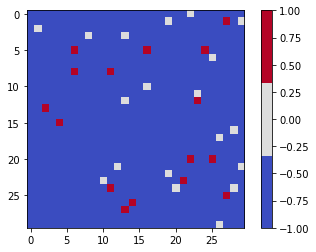

In [13]:
labels=np.array(1000*[0]+1000*[1])
main(x_scaled,labels)

## PCA

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
x_pca = pca.transform(normdatos_train)

In [16]:
labels=np.array(1000*[0]+1000*[1])
labels=labels.reshape((2000,1))
x_pca=np.concatenate([x_pca,labels],axis=1)

In [17]:
x_pca.shape
x_pcadf=pd.DataFrame(x_pca,columns=['PCA1','PCA2','label'])

In [ ]:
x_pcadf

In [18]:
x=x_pcadf['PCA1'].values
y=x_pcadf['PCA2'].values
colores=x_pcadf['label'].values
clase=np.array(['Normal','Amenaza'])

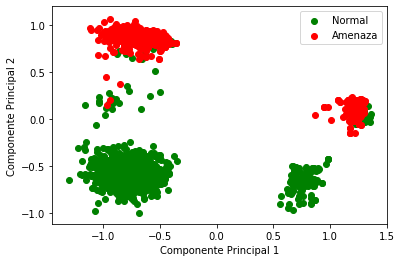

In [19]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
for especie, color in zip([0,1],['g','r']):
    ax.scatter(x[colores==float(especie)],y[colores==float(especie)],c=color,label=clase[especie])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
ax.legend()
plt.show()